Concatenating all of the CSV Files together to have an easier time handling all the data at once (excluding the median-rent dataset)

Problem: In the median_rent dataset there were towns that were duplicated because some ended with Spaces while some had no spaces, some 'KALLANG/WHAMPOA' were labelled as 'KALLANG/ WHAMPOA'
Solution: Loop through ['town'] and do .strip() to remove any whitespaces. Use the if condition to check if 'KALLANG' is in the current ['town'] iteration, then replace it with 'KALLANG/WHAMPOA'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# File paths for the CSV files
resale_1990_1999 = './resale-flat-price-CSVs/resale-flat-prices-based-on-approval-date-1990-1999.csv'
resale_2000_2012 = './resale-flat-price-CSVs/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv'
resale_mar2012_dec2014 = './resale-flat-price-CSVs/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv'
resale_jan2015_dec2016 = './resale-flat-price-CSVs/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv'
resale_2017_onwards = './resale-flat-price-CSVs/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv'
median_rent = './median-rent-by-town-and-flat-type/median-rent-by-town-and-flat-type.csv'
renting_out_flats = './renting-out-of-flats.csv'

# Load the datasets from CSV files
data1 = np.genfromtxt(resale_1990_1999, encoding=None, dtype=None, delimiter=',', names=True, usecols=("month", "town", "flat_type", "lease_commence_date", "resale_price"))
data2 = np.genfromtxt(resale_2000_2012, encoding=None, dtype=None, delimiter=',', names=True, usecols=("month", "town", "flat_type", "lease_commence_date", "resale_price"))
data3 = np.genfromtxt(resale_mar2012_dec2014, encoding=None, dtype=None, delimiter=',', names=True, usecols=("month", "town", "flat_type", "lease_commence_date", "resale_price"))
data4 = np.genfromtxt(resale_jan2015_dec2016, encoding=None, dtype=None, delimiter=',', names=True, usecols=("month", "town", "flat_type", "lease_commence_date", "resale_price"))
data5 = np.genfromtxt(resale_2017_onwards, encoding=None, dtype=None, delimiter=',', names=True, usecols=("month", "town", "flat_type", "lease_commence_date", "resale_price"))
data6 = np.genfromtxt(median_rent, encoding=None, dtype=None, delimiter=',', names=True, usecols=("quarter", "town", "flat_type", "median_rent"))
data7 = np.genfromtxt(renting_out_flats, encoding=None, dtype=None, delimiter=',', names=True, usecols=("rent_approval_date", "town", "flat_type", "monthly_rent"))

# Combine the datasets into one array
concatenated_data = np.concatenate((data1, data2, data3, data4, data5))

# Save the combined array to a new CSV file 
#Just used for checking
#np.savetxt('combined_data.csv', concatenated_data, delimiter=',', fmt='%s')

#Data sanitation
def sanitization_function():
    #counter = 0
    for i in range(len(concatenated_data)):
        concatenated_data[i]['town'] = concatenated_data[i]['town'].strip()

    for i in range(len(data6)):
        data6[i]['town'] = data6[i]['town'].strip()
        
        if 'KALLANG' in data6[i]['town']:
            data6[i]['town'] = 'KALLANG/WHAMPOA'

        if not data6[i]['median_rent'].isnumeric() or data6[i]['median_rent'] == 'na':
            data6[i]['median_rent'] = 'NA'
            
        # if ('2020' in data6[i]['quarter'] or '2021' in data6[i]['quarter'] or '2022' in data6[i]['quarter'] or '2023' in data6[i]['quarter']) and (data6[i]['median_rent'] == 'NA'):
        #    counter += 1
        # Used to debug amount of filtered out 'NA'
    #print(counter)
sanitization_function()

#Checks to see if the number of towns in the median_rent dataset corelates to the concatenated dataset
''' unique_towns = np.unique(concatenated_data['town'])
unique_towns2 = np.unique(data6['town'])
print(len(unique_towns))
print(len(unique_towns2)) '''


" unique_towns = np.unique(concatenated_data['town'])\nunique_towns2 = np.unique(data6['town'])\nprint(len(unique_towns))\nprint(len(unique_towns2)) "

Graph 1 - Pie Chart

Dataset used: 
- resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv & median-rent-by-town-and-flat-type.csv

Pecularities: 
- The median-rent dataset included some data from 2023 but the resale dataset did not, hence, I decided to keep to using collected data from 2020 - 2022 only in order to keep the data comparisons between Flat Types fair and accurate

Question:
- Which flat type have the most recorded data amongst both Resale and calculated Median Rent?


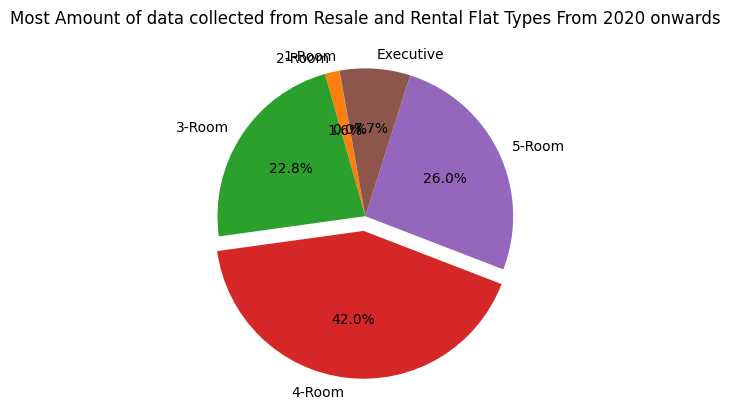

In [3]:
keyword1 = '1 ROOM'
keyword2 = '2 ROOM'
keyword3 = '3 ROOM'
keyword4 = '4 ROOM'
keyword5 = '5 ROOM'
keyword6 = 'EXECUTIVE'     


keyword7 = '1-RM'
keyword8 = '2-RM'
keyword9 = '3-RM'
keyword10 = '4-RM'
keyword11 = '5-RM'
keyword12 = 'EXEC'  

#Only using data from 2020 and onwards because they are the most recent and relevant data

#data5
arr = []
for i in range(len(data5)):
    if '2020' in data5[i]['month'] or '2021' in data5[i]['month'] or '2022' in data5[i]['month']:
        arr.append(data5[i])
    else:
        i = i

np_arr = np.array(arr)

data5_1flat = np_arr[np_arr['flat_type'] == keyword1]
data5_2flat = np_arr[np_arr['flat_type'] == keyword2]
data5_3flat = np_arr[np_arr['flat_type'] == keyword3]
data5_4flat = np_arr[np_arr['flat_type'] == keyword4]
data5_5flat = np_arr[np_arr['flat_type'] == keyword5]
data5_Exec = np_arr[np_arr['flat_type'] == keyword6]

#data6
arr2 = []
for i in range(len(data6)):
    if ('2020' in data6[i]['quarter'] or '2021' in data6[i]['quarter'] or '2022' in data6[i]['quarter']) and (data6[i]['median_rent'] != 'NA'):
        arr2.append(data6[i])
    else:
        i = i

np_arr_2 = np.array(arr2)

data6_1flat = np_arr_2[np_arr_2['flat_type'] == keyword7]
data6_2flat = np_arr_2[np_arr_2['flat_type'] == keyword8]
data6_3flat = np_arr_2[np_arr_2['flat_type'] == keyword9]
data6_4flat = np_arr_2[np_arr_2['flat_type'] == keyword10]
data6_5flat = np_arr_2[np_arr_2['flat_type'] == keyword11]
data6_Exec = np_arr_2[np_arr_2['flat_type'] == keyword12]


total_1_room_flat_resales_and_median_rent_by_quarters = len(data5_1flat) + len(data6_1flat)
total_2_room_flat_resales_and_median_rent_by_quarters = len(data5_2flat) + len(data6_2flat)
total_3_room_flat_resales_and_median_rent_by_quarters = len(data5_3flat) + len(data6_3flat)
total_4_room_flat_resales_and_median_rent_by_quarters = len(data5_4flat) + len(data6_4flat)
total_5_room_flat_resales_and_median_rent_by_quarters = len(data5_5flat) + len(data6_5flat)
total_exec_room_flat_resales_and_median_rent_by_quarters = len(data5_Exec) + len(data6_Exec)


flat_types = ['1-Room', '2-Room','3-Room','4-Room','5-Room','Executive']
room_type_counts = [total_1_room_flat_resales_and_median_rent_by_quarters,total_2_room_flat_resales_and_median_rent_by_quarters,total_3_room_flat_resales_and_median_rent_by_quarters,total_4_room_flat_resales_and_median_rent_by_quarters,total_5_room_flat_resales_and_median_rent_by_quarters,total_exec_room_flat_resales_and_median_rent_by_quarters]
explode = [0,0,0,0.1,0,0]

plt.pie(room_type_counts, labels=flat_types, autopct='%1.1f%%', startangle=100, explode=explode)
plt.title('Most Amount of data collected from Resale and Rental Flat Types From 2020 onwards')
plt.show()

Findings and Insight:

 - Based on the displayed Pie Chart, it is shown that 4-ROOM Flat Types have the most amount of relevant resale and rental data recorded.

 - This would make 4-ROOM Flat Type the most optimal choice to invest in, since the market for 4-ROOM Flat Types have the highest number of activity across recent years

=======================================================================================================================================

Graph 2 - Bar Graph

Dataset used: 
- renting-out-of-flats.csv

Questions:

- What is the total number of rentals that were approved in each Town?

- Which towns have the most/are the most popular when it comes to number of recorded approved rentals?

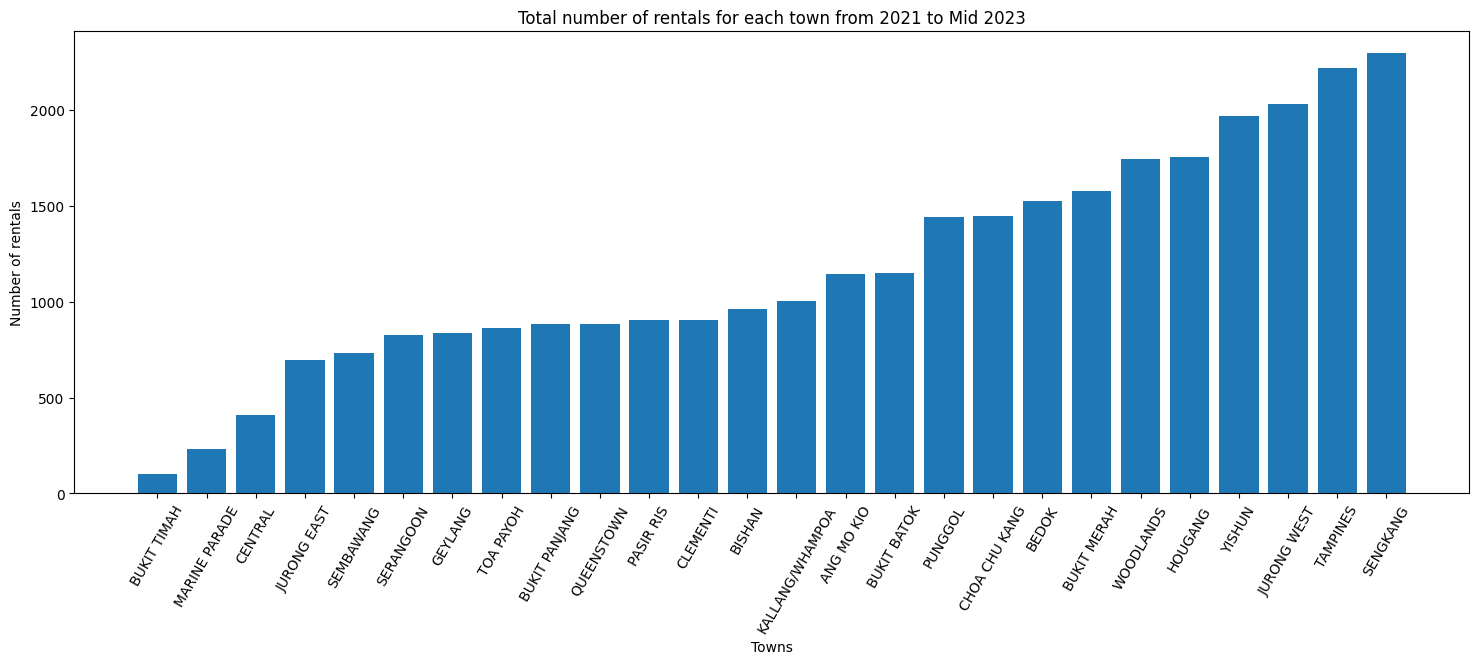

In [4]:

data7_np = np.array(data7)

dict = {}

towns = [
    'ANG MO KIO',
    'BEDOK',
    'BISHAN',
    'BUKIT BATOK',
    'BUKIT MERAH',
    'BUKIT PANJANG',
    'BUKIT TIMAH',
    'CENTRAL',
    'CHOA CHU KANG',
    'CLEMENTI',
    'GEYLANG',
    'HOUGANG',
    'JURONG EAST',
    'JURONG WEST',
    'KALLANG/WHAMPOA',
    'MARINE PARADE',
    'PASIR RIS',
    'PUNGGOL',
    'QUEENSTOWN',
    'SEMBAWANG',
    'SENGKANG',
    'SERANGOON',
    'TAMPINES',
    'TOA PAYOH',
    'WOODLANDS',
    'YISHUN'
]

x_label = 'Towns'
y_label = 'Number of rentals'
title = 'Total number of rentals for each town from 2021 to Mid 2023'


plt.figure(figsize=(18,6))
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)
plt.xticks(rotation=60)

for town in towns:  
    for item in data7_np:
        flat_type = item['flat_type']
        if town == item['town']:
            town = item['town']
            if (flat_type == '4-ROOM'):
                try:
                    town_rental_count = {town: dict[town] + 1}
                except:
                    town_rental_count = {town: 1}
                
                dict.update(town_rental_count)

sorted_dict = sorted(dict.items(), key=lambda x:x[1])

sorted_towns = [item[0] for item in sorted_dict]
sorted_counts = [item[1] for item in sorted_dict]

plt.bar(sorted_towns, sorted_counts)
    


plt.show()







Findings and Insight:

- The bar graph above represents the total number of approved rentals for each Town from January 2021 - April 2023 in ascending order

- Through the usage of bar graph visualisation, the top few towns with the most number of recorded rentals are Yishun, Jurong West, Tampines and Serangoon being the highest

The findings above are especially useful because it allows us to be able to identify and weed out the non-popular areas so that the investor can make the most optimal investment decision according to the different demands for rental for different towns/areas

=======================================================================================================================================

Graph 3 - Line Graph

Dataset used:
- renting-out-of-flats.csv

Pretext:
- We have identified the top few towns that has the most number of recorded approved rentals

Questions:
- What are the trends for the number of rentals happening each month in these top few towns like over the recent years?

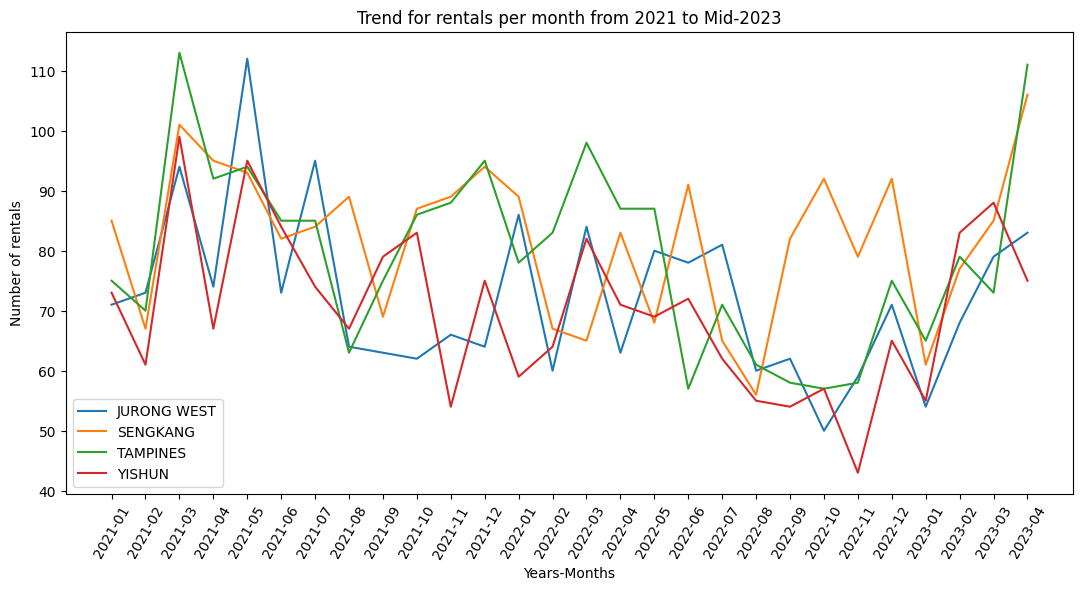

In [5]:
dict = {}

towns = [
    # 'ANG MO KIO',
    # 'BEDOK',
    # 'BISHAN',
    # 'BUKIT BATOK',
    # 'BUKIT MERAH',
    # 'BUKIT PANJANG',
    # 'BUKIT TIMAH',
    # 'CENTRAL',
    # 'CHOA CHU KANG',
    # 'CLEMENTI',
    # 'GEYLANG',
    # 'HOUGANG',
    # 'JURONG EAST',
    'JURONG WEST',
    # 'KALLANG/WHAMPOA',
    # 'MARINE PARADE',
    # 'PASIR RIS',
    # 'PUNGGOL',
    # 'QUEENSTOWN',
    # 'SEMBAWANG',
    'SENGKANG',
    # 'SERANGOON',
    'TAMPINES',
    # 'TOA PAYOH',
    # 'WOODLANDS',
    'YISHUN'
]

x_label = 'Years-Months'
y_label = 'Number of rentals'
title = 'Trend for rentals per month from 2021 to Mid-2023'

plt.figure(figsize=(13,6))
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)
plt.xticks(rotation=60)

for town in towns:
    dict={}
    for item in data7_np:
        flat_type = item['flat_type']
        if town == item['town']:
            town = item['town']
            rent_approval_date = item['rent_approval_date']
            if (flat_type == '4-ROOM'):
                try:
                    lol = {rent_approval_date: dict[rent_approval_date] + 1}
                except:
                    lol = {rent_approval_date: 1}
                
                dict.update(lol)


    plt.plot(dict.keys(), dict.values())
    


plt.legend(towns)
plt.show()

Findings and Insight:

- The towns that should be kept in mind would be Jurong West, Seng Kang and Tampines.

- Yishun is not chosen. Based on the trend for number of rentals happening a month for Yishun, the market for flat rentals in Yishun seems to be quite volatile since Yishun has a highest of peak 100 rentals a month and the lowest of about 40 rentals a month.

- Not only that, currently in April 2023, Yishun flat rentals seem to be going on a decline.

- Jurong West, Seng Kang and Tampines each have a more stable market. Not only that, the demands for flat rentals in Seng Kang and Tampines are rising at a rapid rate and Jurong West flats are increasing at a slightly slower but steady rate 

=======================================================================================================================================

Graph 4 - Scatter Plot

Dataset used:
- median-rent-by-town-and-flat-type.csv
- resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv

Pecularities:
- There are duplicated data for the CSV 'median-rent-by-town-and-flat-type.csv'
- To solve this issue, the mean of the duplicated data is taken, and that value used to plot the graph.

Pretext:
- The trend of the top 4 towns with the most number of rentals that has happened over the recent years (2021-2023) is displayed above.

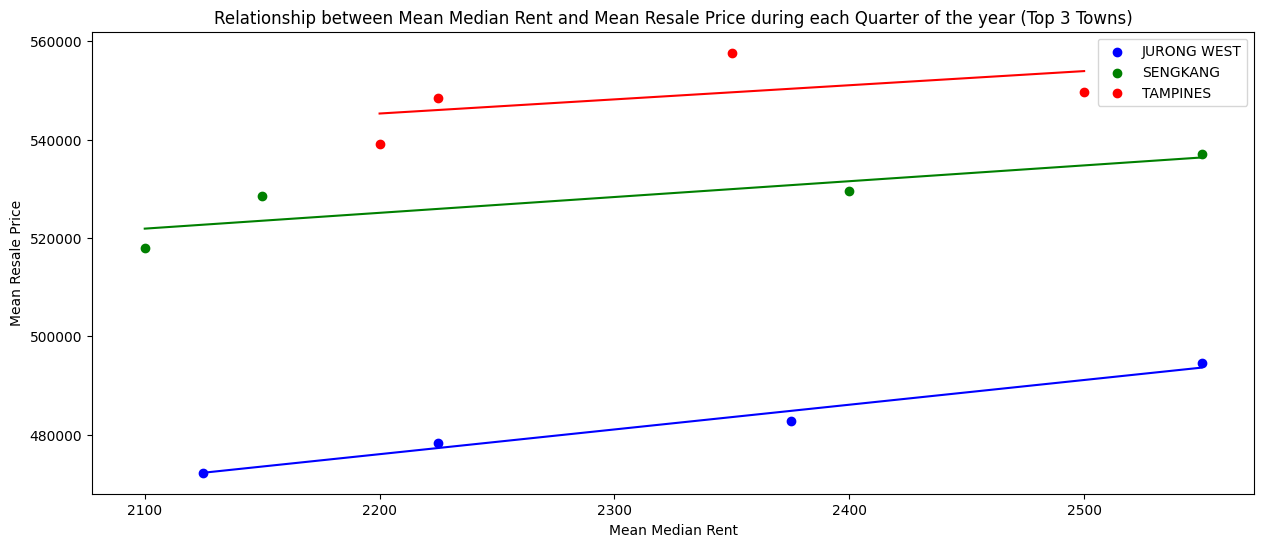

In [9]:
data5_np = np.array(data5)
data6_np = np.array(data6)

#The top few towns that have been identified from previous graphs
top_towns = [
    'JURONG WEST',
    'SENGKANG',
    'TAMPINES',
]


recent_months_resale = []

start_year = 2021
start_month = 1

while start_year < 2024 or start_year == 2022:
    month_str = str(start_month).zfill(2)
    recent_months_resale.append(f'{start_year}-{month_str}')
    
    start_month += 1
    
    if start_month > 12:
        start_month = 1
        start_year += 1

quarters_median_rent = []

start_year = 2021
start_quarter = 1

while start_year < 2024 or start_year == 2022:
    quarter_str = str(f'Q{start_quarter}')
    quarters_median_rent.append(f'{start_year}-{quarter_str}')
    
    start_quarter += 1
    
    if start_quarter > 4:
        start_quarter = 1
        start_year += 1

#Certain Graph configurations to make the graph more "readable" and intepretable
x_label = 'Mean Median Rent'
y_label = 'Mean Resale Price'
title = 'Relationship between Mean Median Rent and Mean Resale Price during each Quarter of the year (Top 3 Towns)'

plt.figure(figsize=[15,6])
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

#Maps each town to 1 colour
color_mapping = {
    'JURONG WEST': 'blue',
    'SENGKANG': 'green',
    'TAMPINES': 'red'
}

for town in top_towns:

    colors = color_mapping[town]

    first_quarter_resale_prices = []
    second_quarter_resale_prices = []
    third_quarter_resale_prices = []
    fourth_quarter_resale_prices = []

    first_quarter_median_rent = []
    second_quarter_median_rent = []
    third_quarter_median_rent = []
    fourth_quarter_median_rent = []

    for quarters in quarters_median_rent:
        for item in data6_np:

            flat_type = item['flat_type']
            quarter = item['quarter']

            if town == item['town']:

                if quarters == quarter:
                    if (flat_type == '4-RM') and ('Q1' in quarters):
                        if (item['median_rent'] == 'NA'):
                            item['median_rent'] = 0
                        first_quarter_median_rent.append(int(item['median_rent']))
                    elif (flat_type == '4-RM') and ('Q2' in quarters):
                        if (item['median_rent'] == 'NA'):
                            item['median_rent'] = 0
                        second_quarter_median_rent.append(int(item['median_rent']))
                    elif (flat_type == '4-RM') and ('Q3' in quarters):
                        if (item['median_rent'] == 'NA'):
                            item['median_rent'] = 0
                        third_quarter_median_rent.append(int(item['median_rent']))
                    elif (flat_type == '4-RM') and ('Q4' in quarters):
                        if (item['median_rent'] == 'NA'):
                            item['median_rent'] = 0
                        fourth_quarter_median_rent.append(int(item['median_rent']))

    first_quarter_median_rent = np.mean(first_quarter_median_rent)
    second_quarter_median_rent = np.mean(second_quarter_median_rent)
    third_quarter_median_rent = np.mean(third_quarter_median_rent)
    fourth_quarter_median_rent = np.mean(fourth_quarter_median_rent)

    for months in recent_months_resale:

        for item in data5_np:
            
            flat_type = item['flat_type']
            month = item['month']

            if town == item['town']:

                if months == month:
                    if (flat_type == '4 ROOM') and ('-01' in months) or ('-02' in months) or ('-03' in months):
                        first_quarter_resale_prices.append(item['resale_price'])
                    elif (flat_type == '4 ROOM') and ('-04' in months) or ('-05' in months) or ('-06' in months):
                        second_quarter_resale_prices.append(item['resale_price'])
                    elif (flat_type == '4 ROOM') and ('-07' in months) or ('-08' in months) or ('-09' in months):
                        third_quarter_resale_prices.append(item['resale_price'])
                    elif (flat_type == '4 ROOM') and ('-10' in months) or ('-11' in months) or ('-12' in months):
                        fourth_quarter_resale_prices.append(item['resale_price'])
            
    first_quarter_resale_prices = np.mean(first_quarter_resale_prices)
    second_quarter_resale_prices = np.mean(second_quarter_resale_prices)
    third_quarter_resale_prices = np.mean(third_quarter_resale_prices)
    fourth_quarter_resale_prices = np.mean(fourth_quarter_resale_prices)

    # Calculate best-fit line
    x = [first_quarter_median_rent, second_quarter_median_rent,
         third_quarter_median_rent, fourth_quarter_median_rent]
    y = [first_quarter_resale_prices, second_quarter_resale_prices,
         third_quarter_resale_prices, fourth_quarter_resale_prices]
    coeffs = np.polyfit(x, y, 1)  # Fit a linear polynomial of degree 1
    best_fit_line = np.poly1d(coeffs)

    # Plot best-fit line
    x_range = np.linspace(min(x), max(x), 100)

    plt.scatter(first_quarter_median_rent, first_quarter_resale_prices, color=colors, label=town)
    plt.scatter(second_quarter_median_rent, second_quarter_resale_prices, color=colors)
    plt.scatter(third_quarter_median_rent, third_quarter_resale_prices, color=colors)
    plt.scatter(fourth_quarter_median_rent, fourth_quarter_resale_prices, color=colors)
    plt.plot(x_range, best_fit_line(x_range), color=colors)

    # print(f'{town}:')
    # print(f'The mean resale value of flats in {town} from Jan to Mar {months[:4]} is: $','{:,.0f}'.format(first_quarter_resale_prices))
    # print(f'The mean median rent of flats in {town} from Jan to Mar {months[:4]} is: $','{:,.0f}'.format(first_quarter_median_rent), '\n')
    # print(f'The mean resale value of flats in {town} from Apr to June {months[:4]} is: $','{:,.0f}'.format(second_quarter_resale_prices))
    # print(f'The mean median rent of flats in {town} from Apr to June {months[:4]} is: $','{:,.0f}'.format(second_quarter_median_rent), '\n')
    # print(f'The mean resale value of flats in {town} from July to Sept {months[:4]} is: $','{:,.0f}'.format(third_quarter_resale_prices))
    # print(f'The mean median rent of flats in {town} from July to Sept {months[:4]} is: $','{:,.0f}'.format(third_quarter_median_rent), '\n')
    # print(f'The mean resale value of flats in {town} from Oct to Dec {months[:4]} is: $','{:,.0f}'.format(fourth_quarter_resale_prices))
    # print(f'The mean median rent of flats in {town} from Oct to Dec {months[:4]} is: $','{:,.0f}'.format(first_quarter_median_rent), '\n')


plt.legend()
plt.show()



            
    

Findings and Insight:
- Based on the scatter plot above, on average, rentals during the fourth quarter of the year from years 2021-2023